<a href="https://colab.research.google.com/github/exponentialR/DeepLearningFundamentals/blob/main/Simple%20Classification%20Model%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 

In [ ]:
#import the data 
from sklearn.datasets import load_breast_cancer

In [ ]:
#load the data 
data = load_breast_cancer()

In [ ]:
#check the data type 
type(data)

sklearn.utils.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target_names


array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (data.data, data.target, test_size = 0.33)
N, D = X_train.shape

In [ ]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Now build the model using Tensorflow 

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer = 'adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Train the model 
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

#Evaluate the model - evaluate () returns loss and accuracy

print("Train Score:", model.evaluate(X_train, y_train))
print("Test Score:", model.evaluate (X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 11ms/step - loss: 0.9145 - accuracy: 0.4409 - val_loss: 0.8668 - val_accuracy: 0.5000
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8341 - accuracy: 0.5197 - val_loss: 0.7974 - val_accuracy: 0.5585
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7615 - accuracy: 0.5827 - val_loss: 0.7364 - val_accuracy: 0.6277
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.6352 - val_loss: 0.6821 - val_accuracy: 0.6596
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6448 - accuracy: 0.6693 - val_loss: 0.6336 - val_accuracy: 0.7181
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5962 - accuracy: 0.7087 - val_loss: 0.5919 - val_accuracy: 0.7606
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5548 - accuracy: 0.7454 - val_loss: 0.5550 - val_accuracy: 0.7713
Epoch 8/100


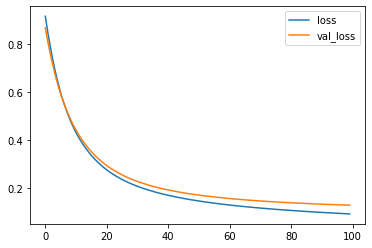

In [ ]:
#Plot the output of the model.fit()

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()


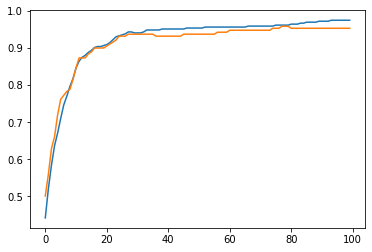

In [ ]:
#Plot the accuracy too 
plt.plot(r.history ['accuracy'], label = 'acc')
plt.plot(r.history ['val_accuracy'], label ='val_acc')